In [25]:
import sys
import numpy as np
import pandas as pd
from time import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
df = pd.read_excel(r'C:\Users\Guo Beiting\Downloads\Dry_Bean_Dataset.xlsx')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [26]:
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

X = df.drop(columns='Class')
y = df['Class']

In [27]:
#Splitting Data Into Train and Test Subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [28]:
def dimensionality_reduction_LDA(n_components, X_train, y_train):
    print("Extracting the top %d features from %d data"% (n_components, X_train.shape[0]))
    t0 = time()
    pca = PCA(n_components=n_components).fit(X_train)

    lda = LDA().fit(pca.transform(X_train), y_train)
    print("done in %0.3fs" % (time() - t0))

    return lda, pca

def train_text_transform_LDA(lda, pca, X_train, X_test):
    print("Projecting the input data on the eigen orthonormal basis")
    t0 = time()
    X_train_lda = lda.transform(pca.transform(X_train))
    X_test_lda = lda.transform(pca.transform(X_test))
    print("done in %0.3fs" % (time() - t0))

    return X_train_lda, X_test_lda

Extracting the top 4 features from 10888 data
done in 0.036s
Projecting the input data on the eigen orthonormal basis
done in 0.005s
(10888, 4) (2723, 4)
(10888,) (2723,)
[[ 2.67730032  2.09255608 -1.40644943 -0.55497154]
 [ 1.82467738  0.33743193  0.5522468  -0.41789275]
 [ 2.28088434  2.57485334 -0.11342461 -0.19002895]
 ...
 [-4.15495989 -2.9032564  -0.46863772  1.92247051]
 [ 1.23108716  2.71085388  1.36672397  0.2137488 ]
 [-0.47055382 -3.99705565 -0.95716152  1.13682749]] [[ 0.75565127  2.54560235  1.5290475   0.56200766]
 [-1.45618724 -3.29782617  4.69909849 -2.43166291]
 [ 1.36217194  2.5054856   1.03721544  0.17184932]
 ...
 [ 2.65496595  2.56594501 -1.25033153 -0.33017878]
 [-2.45683983 -1.84249483  0.81270743  0.16021843]
 [ 1.58763497  0.74091287 -0.4122009   0.23247415]]

Confusion Matrix: 
 [[220   0  28   0   3   4   6]
 [  0 117   0   0   0   0   0]
 [  9   0 301   0   3   0   4]
 [  0   0   0 615   1   7  48]
 [  1   0   9   5 385   0   8]
 [  4   0   1  15   0 379  14

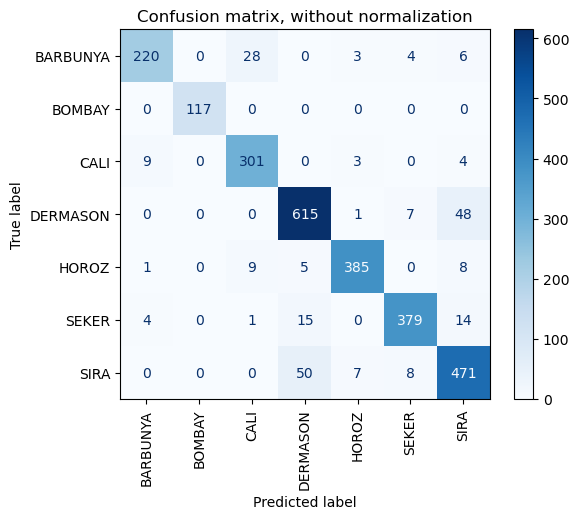

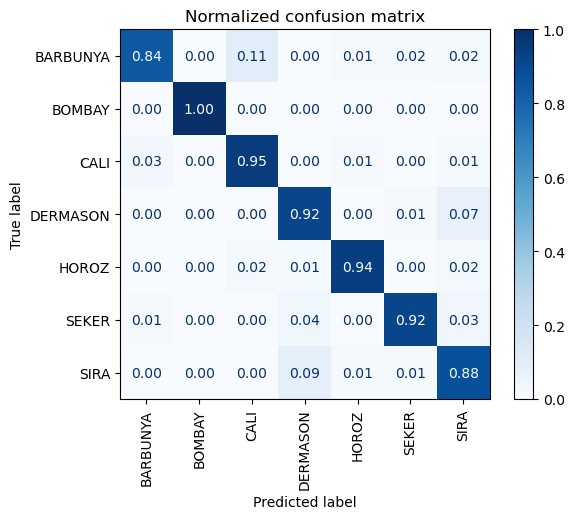

In [31]:
# LDa without sacled standardized features and test data
n_components = 4

lda, pca = dimensionality_reduction_LDA(n_components, X_train, y_train)

X_train_lda, X_test_lda = train_text_transform_LDA(lda, pca, X_train, X_test)
print(X_train_lda.shape, X_test_lda.shape)
print(y_train.shape, y_test.shape)
forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)
print(X_train_lda, X_test_lda)
forest.fit(X_train_lda, y_train)
y_pred = forest.predict(X_test_lda)
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix


print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy Score: ', accuracy_score(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test, y_pred))
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        forest,
        X_test_lda,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)
    
plt.show()

In [7]:
# LDA with standardized features
#Standarizing Features
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [14]:
n_components = 4

lda, pca = dimensionality_reduction_LDA(n_components, X_train_scaled, y_train)

X_train_lda, X_test_lda = train_text_transform_LDA(lda, pca, X_train_scaled, X_test_scaled)
print(X_train_lda.shape, X_test_lda.shape)
print(y_train.shape, y_test.shape)

Extracting the top 4 features from 10888 data
done in 0.041s
Projecting the input data on the eigen orthonormal basis
done in 0.001s
(10888, 4) (2723, 4)
(10888,) (2723,)


In [15]:
forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)

forest.fit(X_train_lda, y_train)
y_pred = forest.predict(X_test_lda)

In [16]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix


print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy Score: ', accuracy_score(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test, y_pred))


Confusion Matrix: 
 [[151   0  90   0   1   2  17]
 [  0 117   0   0   0   0   0]
 [ 31   0 280   0   4   0   2]
 [  0   0   0 619   0   6  46]
 [  1   0   4   3 386   0  14]
 [  2   0   0  16   0 385  10]
 [  1   0   1  59   3   4 468]]

Accuracy Score:  0.8835842820418656

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.58      0.68       261
           1       1.00      1.00      1.00       117
           2       0.75      0.88      0.81       317
           3       0.89      0.92      0.90       671
           4       0.98      0.95      0.96       408
           5       0.97      0.93      0.95       413
           6       0.84      0.87      0.86       536

    accuracy                           0.88      2723
   macro avg       0.89      0.88      0.88      2723
weighted avg       0.89      0.88      0.88      2723



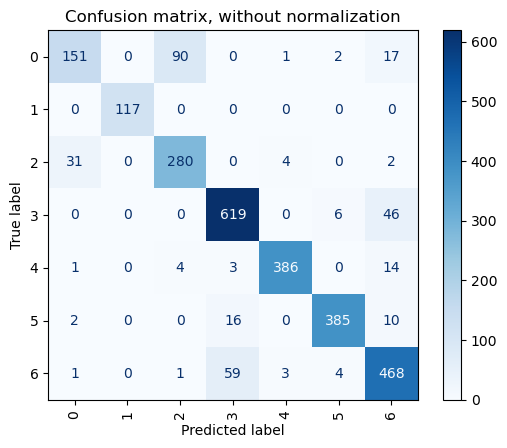

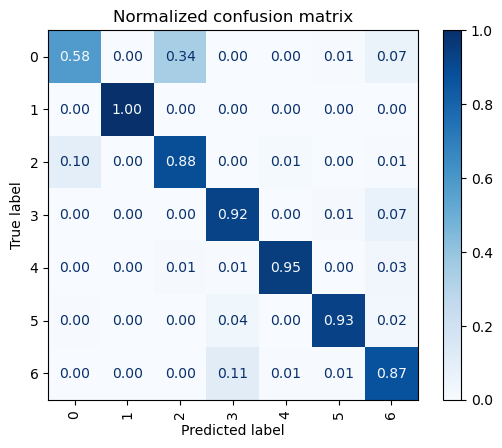

In [18]:
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        forest,
        X_test_lda,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)
    
plt.show()